# **Assignment: Random Forest Regression for House Price Prediction**

## **Objective**  
Train and evaluate a **Random Forest Regression model** to predict house prices based on various features such as area, number of bedrooms, population, etc.

---

## **Dataset**  
Download the **USA Housing Price dataset** from Kaggle:  
🔗 [USA Housing Price Dataset](https://www.kaggle.com/datasets/gpandi007/usa-housing-dataset)  

- Load the dataset into a Pandas DataFrame.  
- Display the first few rows to understand the structure.  

---

## **Tasks**  

### **1. Data Preprocessing**  
- Drop irrelevant columns such as "Address" (if applicable).  
- Check and handle missing values.  
- Normalize numerical features using **StandardScaler**.   

---

### **2. Train Random Forest Regression Model**  
- Train a **Random Forest Regressor** with default parameters.  
- Evaluate its initial performance.  

---

### **3. Hyperparameter Tuning**  
- Use **GridSearchCV** to tune the following hyperparameters:  
  - `n_estimators` (Number of trees in the forest)  
  - `max_depth` (Maximum depth of each tree)  
  - `min_samples_split` (Minimum samples required to split a node)  
  - `min_samples_leaf` (Minimum samples required at a leaf node)  

---

### **4. Model Evaluation**  
- Compute and print the following metrics for both the **default** and **tuned** models:  
  - **Mean Squared Error (MSE)**  
  - **Mean Absolute Error (MAE)**  
  - **R² Score**  

---

### **5. Visualization**  
- Plot **Actual vs. Predicted values** for the Random Forest model.  
- Plot a **feature importance graph** to analyze which features contribute the most to house price prediction.  

---

## **Submission Guidelines**  
- Submit a **colab Notebook (.ipynb)** with code and visualizations.  


## CONNECTING DRIVE

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Datasets

In [5]:
import pandas as pd

train_df  = pd.read_csv('/content/drive/MyDrive/Data Science./Class 15 (18 April) (Assignments Solutions)/Solution/Random Forest Assignment/housing_train.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/Data Science./Class 15 (18 April) (Assignments Solutions)/Solution/Random Forest Assignment/housing_test.csv')



In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Droping 'Address' column (if exists)


In [8]:
if 'Address' in train_df.columns:
    train_df = train_df.drop(columns=['Address'])
    test_df = test_df.drop(columns=['Address'])

# Checking for Missing Values


In [9]:
print("Missing values in training data:\n", train_df.isnull().sum())

Missing values in training data:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# Handle Missing Values: Fill numerics with Median, Categoricals with Mode:


In [10]:
for col in train_df.columns:
    if train_df[col].dtype in ['float64', 'int64']:
        median_val = train_df[col].median()
        train_df[col] = train_df[col].fillna(median_val)
        if col in test_df.columns:
            test_df[col] = test_df[col].fillna(median_val)
    else:
        mode_val = train_df[col].mode()[0]
        train_df[col] = train_df[col].fillna(mode_val)
        if col in test_df.columns:
            test_df[col] = test_df[col].fillna(mode_val)



# One-Hot Encoding for Categorical Variables


In [11]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Align Columns of Test to Match Training set


In [12]:
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Check for Missing Values


In [13]:
print("Missing values in training data:\n", train_df.isnull().sum())

Missing values in training data:
 Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 289, dtype: int64


# Separate Features and Target


In [14]:
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

# Note: If Test set might not have 'SalePrice'


In [15]:
if 'SalePrice' in test_df.columns:
    X_test = test_df.drop('SalePrice', axis=1)
    y_test = test_df['SalePrice']
else:
    X_test = test_df
    y_test = None  # Placeholder

# Normalize Numeric Features


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Default Random Forest Regressor


In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

# Predictions


In [18]:
y_pred_default = rf_default.predict(X_test_scaled)

# Evaluate Default Model


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\n📌 Default Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_default))
print("MAE:", mean_absolute_error(y_test, y_pred_default))
print("R² Score:", r2_score(y_test, y_pred_default))



📌 Default Model Performance:
MSE: 37424412642.80753
MAE: 179080.1590130226
R² Score: 0.0


# Hyperparameter Tuning using GridSearchCV


In [20]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [21]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=1)

# Best Estimator


In [22]:
best_rf = grid_search.best_estimator_
print("\n✅ Best Parameters:", grid_search.best_params_)


✅ Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Predictions with Best Model


In [23]:
y_pred_best = best_rf.predict(X_test_scaled)

# 📊 Evaluate Tuned Model


In [24]:
print("\n📌 Tuned Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))


📌 Tuned Model Performance:
MSE: 37396000387.80831
MAE: 179039.12361724328
R² Score: 0.0


# Importing Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📈 Visualization: Actual vs. Predicted


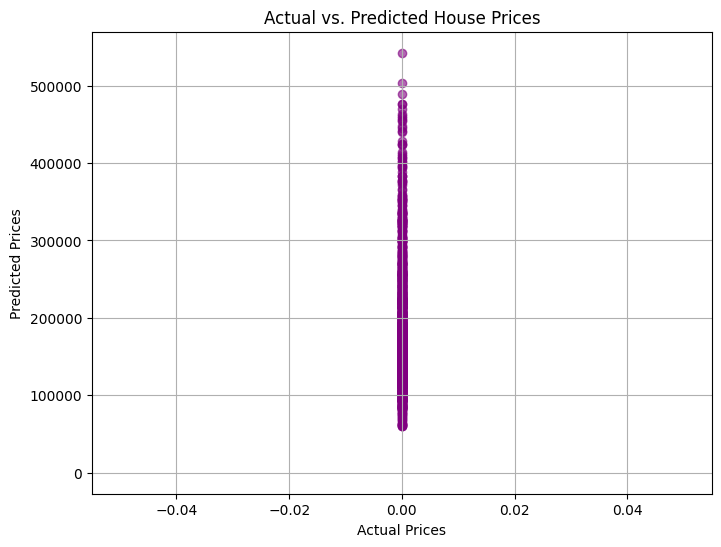

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()

# 📊 Feature Importance


In [29]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance


<ipython-input-30-7c54f8a71cd1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


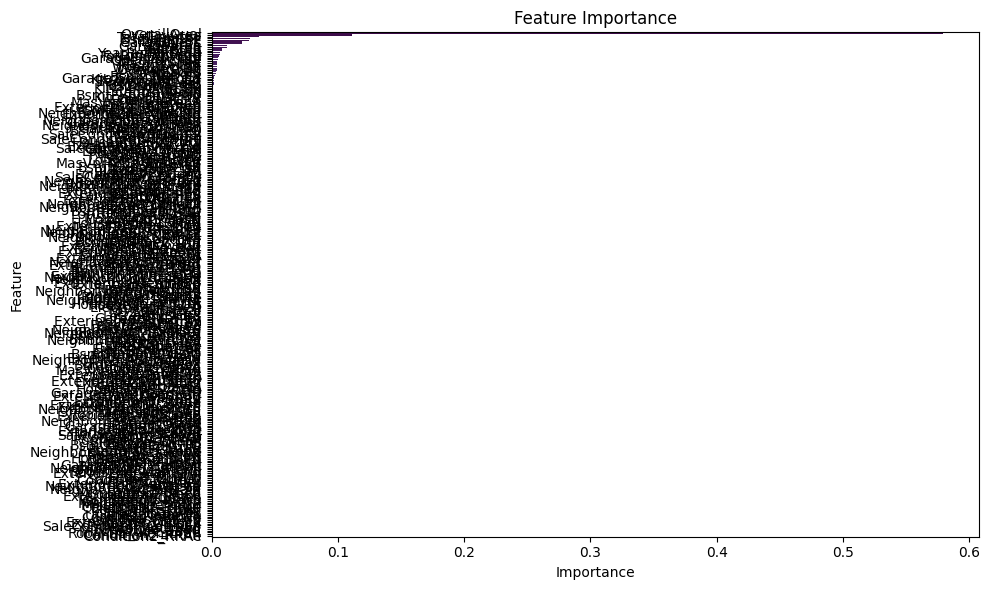

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()